# Simulating logic gates using `crysx_nn`

## Run the following for Google colab 
then restart runtime

In [ ]:
! pip install --upgrade --no-cache-dir https://github.com/manassharma07/crysx_nn/tarball/main
! pip install IPython==7.7.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define some network parameters that we will be using to initialize the model

In [2]:
nInputs = 2 # No. of nodes in the input layer
neurons_per_layer = [3, 1] # Neurons per layer (excluding the input layer)
activation_func_names = ['Tanh_offset', 'Tanh_offset']
nLayers = len(neurons_per_layer)
nEpochs=10**4
batchSize = 4 # No. of input samples to process at a time for optimization

## Create the neural network model

In [3]:
from crysx_nn import network
model = network.nn_model(nInputs=nInputs, neurons_per_layer=neurons_per_layer, activation_func_names=activation_func_names, batch_size=batchSize, device='CPU', init_method='Xavier') 

C:\Users\manas\anaconda3\envs\crysx_nn\lib\site-packages\crysx_nn\network.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Note: The model will use the following device for all the computations:  CPU


## Check the details of the model for confirmation

In [4]:
model.details()

----------------------------------------------------------------------------------
****Neural Network Model Details****
----------------------------------------------------------------------------------
Number of input nodes:  2
Number of layers (hidden+output):  2
Number of nodes in each layer (hidden & output):  [3, 1]
Activation function for each layer (hidden & output):   ['Tanh_offset', 'Tanh_offset']
Method used for weights and biases initialization:   Xavier
Batch Size:  4
Device:  CPU
Optimization method:  SGD
Learning rate:  0.5
----------------------------------------------------------------------------------


## Visualize the network

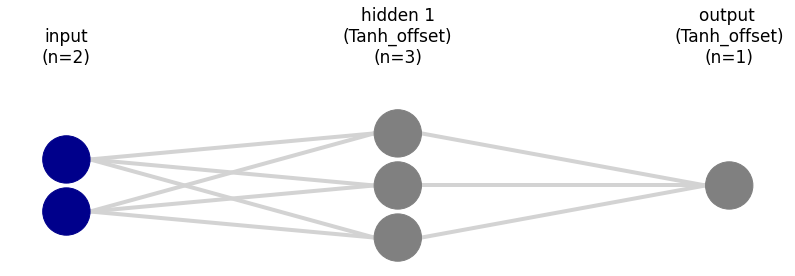

In [5]:
model.visualize()

## Initial Weights and Biases being used by the network

In [6]:
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[ 0.12558332, -0.3422736 ],
       [ 0.31851262,  0.42803845],
       [-0.43887904,  0.6347987 ]], dtype=float32), array([[ 0.03954792, -0.37038806, -0.34789658]], dtype=float32)]
Initial Biases:
 [array([0., 0., 0.], dtype=float32), array([0.], dtype=float32)]


## Set the inputs (rows correspond to different set of inputs and columns represent the inputs)

In [7]:
inputs = np.array([[0.,0.,1.,1.],[0.,1.,0.,1.]]).T.astype(np.float32)
print(inputs)
print(inputs.dtype)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
float32


## Outputs for different logic gates

In [8]:
# AND function
outputAND = np.array([0.,0.,0.,1.])
outputAND = np.asarray([outputAND]).T.astype(np.float32)
# OR function
outputOR = np.array([0.,1.,1.,1.])
outputOR = np.asarray([outputOR]).T.astype(np.float32)
# NAND function
outputNAND = np.array([1.,1.,1.,0.])
outputNAND = np.asarray([outputNAND]).T.astype(np.float32)
# XOR function
outputXOR = np.array([0.,1.,1.,0.])
outputXOR = np.asarray([outputXOR]).T.astype(np.float32)

In [9]:
print('AND outputs\n', outputAND)
print('OR outputs\n', outputOR)
print('XOR outputs\n', outputXOR)
print('NAND outputs\n', outputNAND)

AND outputs
 [[0.]
 [0.]
 [0.]
 [1.]]
OR outputs
 [[0.]
 [1.]
 [1.]
 [1.]]
XOR outputs
 [[0.]
 [1.]
 [1.]
 [0.]]
NAND outputs
 [[1.]
 [1.]
 [1.]
 [0.]]


## You can also reinitialize weights and biases using some other method

In [10]:
model.init_params(method='NormXavier')
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[-1.4715252 , -0.22541663],
       [-0.8465715 ,  0.30914038],
       [-1.5273337 ,  1.732744  ]], dtype=float32), array([[-0.43960682,  1.3403572 , -0.27631533]], dtype=float32)]
Initial Biases:
 [array([0., 0., 0.], dtype=float32), array([0.], dtype=float32)]


## You can also define your own custom initial guess and weights

For example, for a neural network with 2 nodes in input layer, 3 nodes in hidden layer and 1 node in output layer use the following commented code

In [11]:
# # Initial guesses for weights
# w1 = 0.30
# w2 = 0.55
# w3 = 0.20
# w4 = 0.45
# w5 = 0.50
# w6 = 0.35
# w7 = 0.15
# w8 = 0.40
# w9 = 0.25

# # Initial guesses for biases
# b1 = 0.60
# b2 = 0.05

# # need to use a list instead of a numpy array, since the 
# #weight matrices at each layer are not of the same dimensions
# weights = [] 
# # Weights for layer 1 --> 2
# weights.append(np.array([[w1,w4],[w2, w5], [w3, w6]]))
# # Weights for layer 2 --> 3
# weights.append(np.array([[w7, w8, w9]]))
# # List of biases at each layer
# biases = []
# biases.append(np.array([b1,b1,b1]))
# biases.append(np.array([b2]))

# weightsOriginal = weights
# biasesOriginal = biases

# print('Weights matrices: ',weights)
# print('Biases: ',biases)

## Train neural network for AND gate
We will use the Mean Squared Error loss function (MSE_loss)

In [12]:

# Run optimization
model.optimize(inputs, outputAND, lr=0.5,nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.35978004336357117


### Visualize the training loss

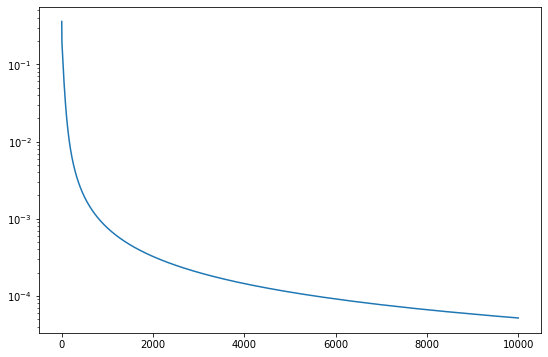

In [13]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [14]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[-1.8640071 , -1.3235682 ],
       [-0.22410783,  2.6081183 ],
       [-2.726411  ,  1.3149884 ]], dtype=float32), array([[-3.6229467,  3.5111527, -2.4383266]], dtype=float32)]
Optimized Biases:  [array([ 2.1798253 , -0.7866814 , -0.19308579], dtype=float32), array([-0.5779454], dtype=float32)]


### Make predictions using the optimized weights

In [15]:
predictions, error = model.predict(inputs, outputAND, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputAND)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[1.1417270e-04]
 [7.6892078e-03]
 [6.1857104e-03]
 [9.8952889e-01]]
Expected Output:
 [[0.]
 [0.]
 [0.]
 [1.]]
New Average Error with optimized weights:
 5.1761004346895234e-05


## Train neural network for NAND gate
We will use the Mean Squared Error loss function (MSE_loss)

## You can reinitialize weights and biases or use the ones optimized for the previous gate for transfer learning

In [16]:
model.init_params()
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[ 0.22374417,  0.03370791],
       [-0.6893616 , -0.16177103],
       [ 0.57168525,  0.6436501 ]], dtype=float32), array([[-0.12825671,  0.39537993,  0.09579867]], dtype=float32)]
Initial Biases:
 [array([0., 0., 0.], dtype=float32), array([0.], dtype=float32)]


In [17]:

# Run optimization
model.optimize(inputs, outputNAND, lr=0.5, nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.20980484038591385


### Visualize the training loss

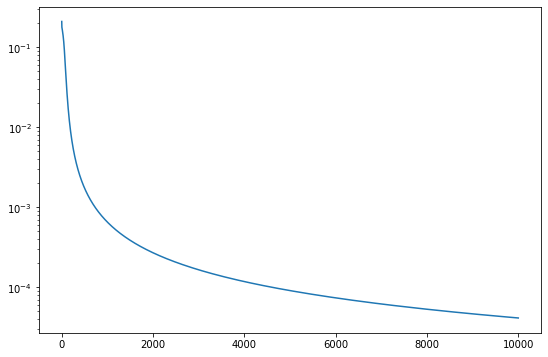

In [18]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [19]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[ 0.7952955 ,  0.63873583],
       [-1.9037392 , -1.8776029 ],
       [ 0.98402137,  1.1285244 ]], dtype=float32), array([[-1.5186172,  4.540551 , -2.277531 ]], dtype=float32)]
Optimized Biases:  [array([-0.7546348,  2.709365 , -1.3780547], dtype=float32), array([0.23853995], dtype=float32)]


### Make predictions using the optimized weights

In [20]:
predictions, error = model.predict(inputs, outputNAND, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputNAND)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[0.99983275]
 [0.99361587]
 [0.99358565]
 [0.00910786]]
Expected Output:
 [[1.]
 [1.]
 [1.]
 [0.]]
New Average Error with optimized weights:
 4.1220539149122715e-05


## Train neural network for OR gate
We will use the Mean Squared Error loss function (MSE_loss)

## You can reinitialize weights and biases or use the ones optimized for the previous gate for transfer learning

In [21]:
model.init_params()
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[-0.65608656, -0.33429363],
       [ 0.68275595,  0.36816308],
       [-0.39196965,  0.44680408]], dtype=float32), array([[-0.55885863, -0.25931144, -0.15798448]], dtype=float32)]
Initial Biases:
 [array([0., 0., 0.], dtype=float32), array([0.], dtype=float32)]


In [22]:

# Run optimization
model.optimize(inputs, outputOR, lr=0.5, nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.3806321583688259


### Visualize the training loss

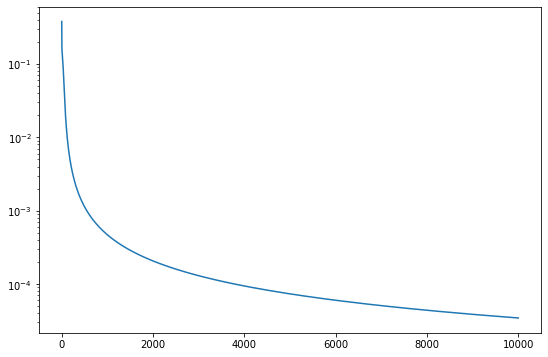

In [23]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [24]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[-2.1582549 , -2.1008732 ],
       [ 1.7301649 ,  1.6291833 ],
       [-0.14439301,  0.66846395]], dtype=float32), array([[-3.853797 ,  2.7667978,  0.3861592]], dtype=float32)]
Optimized Biases:  [array([ 0.99637437, -0.75817996, -0.09721419], dtype=float32), array([0.32702494], dtype=float32)]


### Make predictions using the optimized weights

In [25]:
predictions, error = model.predict(inputs, outputOR, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputOR)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[0.00829217]
 [0.9944352 ]
 [0.99395275]
 [0.99875546]]
Expected Output:
 [[0.]
 [1.]
 [1.]
 [1.]]
New Average Error with optimized weights:
 3.446131563578092e-05


## Train neural network for XOR gate
We will use the Mean Squared Error loss function (MSE_loss)

## You can reinitialize weights and biases or use the ones optimized for the previous gate for transfer learning

In [26]:
model.init_params()
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[-0.49298313, -0.60071534],
       [-0.185411  , -0.7050665 ],
       [ 0.6037338 ,  0.3684936 ]], dtype=float32), array([[-0.5515125 ,  0.2527432 ,  0.47769606]], dtype=float32)]
Initial Biases:
 [array([0., 0., 0.], dtype=float32), array([0.], dtype=float32)]


In [27]:

# Run optimization
model.optimize(inputs, outputXOR, lr=0.5, nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.25875473767518997


### Visualize the training loss

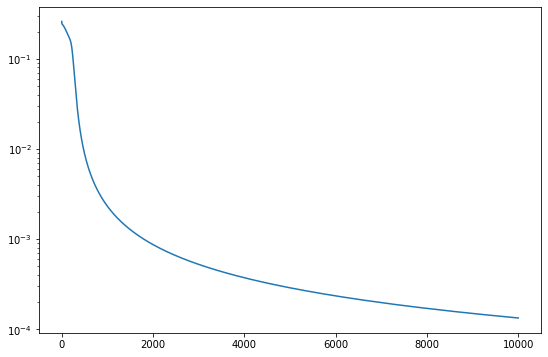

In [28]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [29]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[-3.2440624, -3.26766  ],
       [-2.53162  , -2.5347695],
       [ 1.0496855,  1.1414204]], dtype=float32), array([[-5.442097  ,  5.2905135 , -0.35859296]], dtype=float32)]
Optimized Biases:  [array([1.3540428 , 3.803892  , 0.40850228], dtype=float32), array([-2.199113], dtype=float32)]


### Make predictions using the optimized weights

In [30]:
predictions, error = model.predict(inputs, outputXOR, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputXOR)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[0.01073083]
 [0.9889027 ]
 [0.9888967 ]
 [0.01302823]]
Expected Output:
 [[0.]
 [1.]
 [1.]
 [0.]]
New Average Error with optimized weights:
 0.0001328296639258042
